In [1]:
!pip install selenium


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import selenium 
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import getpass

In [3]:
my_user = "@krishn_amr14597"
my_pass = getpass.getpass()

········


In [4]:
# PATH = r"E:\Untitled Folder\programfiles.exe"
# driver = webdriver.Chrome(PATH)
# driver.get("https://x.com/i/flow/login")
# sleep(3)
# from selenium import webdriver

# Simply create the Chrome driver without specifying the path
driver = webdriver.Chrome()

driver.implicitly_wait(10)

# Now you can use the driver for your web automation tasks
driver.get("https://x.com/i/flow/login")


In [5]:
user_id = driver.find_element(By.XPATH,"//input[@type='text']")
user_id.send_keys(my_user)
user_id.send_keys(Keys.ENTER)
# driver.implicitly_wait(10)

In [6]:
# my_mob = "8875316737"
# mob_no = driver.find_element(By.XPATH,"//input[@type='text']")
# mob_no.send_keys(my_mob)
# mob_no.send_keys(Keys.ENTER)
# # driver.implicitly_wait(10)

In [7]:
password = driver.find_element(By.XPATH,"//input[@type='password']")
password.send_keys(my_pass)
password.send_keys(Keys.ENTER)

In [8]:
search_item = "Liz Truss"
search_box = driver.find_element(By.XPATH,"//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(search_item)
search_box.send_keys(Keys.ENTER)

In [9]:
all_tweets = set()

tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
while True:
    for tweet in tweets:
        all_tweets.add(tweet.text)
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight);')
    sleep(3)
    tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
    if len(all_tweets)>50:
        break

In [10]:
all_tweets = list(all_tweets)
all_tweets[0]


"Liz Truss' podium cost the public £4175. \n\n#KayBurley #BBCBreakfast"

Cleaning the tweets


In [11]:
import pandas as pd
pd.options.display.max_colwidth = 1000
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to C:\Users\Amrit
[nltk_data]     Krishn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Amrit
[nltk_data]     Krishn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
stp_words = stopwords.words('english')
stp_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
df = pd.DataFrame(all_tweets,columns=['tweets'])
df.head()

,tweets
0,Liz Truss' podium cost the public £4175. \n\n#KayBurley #BBCBreakfast
1,"NEW: Keir Starmer is asked why he backed Jeremy Corbyn's manifesto when he compared the Tory manifesto to Corbyn's manifesto \n\nStarmer: ""I campaigned for the Labour party"""
2,British mercenary Harry Gregg hanged himself after returning home from Ukraine\n\nHe was inspired to fight Russia by former UK Prime Minister Liz Truss
3,A squirming Jeremy Hunt really didn't like Charlie Stayt pointing out that interest rates increased after Liz Truss' kamikaze budget.\n\n#BBCBreakfast
4,There's a Liz Truss joke here.


In [14]:
one_tweet =  df['tweets']
one_tweet

0                                                                                                                                                                                                                           Liz Truss' podium cost the public £4175. \n\n#KayBurley #BBCBreakfast
1                                                                                                                   NEW: Keir Starmer is asked why he backed Jeremy Corbyn's manifesto when he compared the Tory manifesto to Corbyn's manifesto \n\nStarmer: "I campaigned for the Labour party"
2                                                                                                                                         British mercenary Harry Gregg hanged himself after returning home from Ukraine\n\nHe was inspired to fight Russia by former UK Prime Minister Liz Truss
3                                                                                                                                 

In [15]:
!pip install textblob
from textblob import TextBlob
from wordcloud import WordCloud

def TweetCleaning(tweet):
    clean_tweet = re.sub('[^a-zA-Z0-9]',' ',tweet)
    clean_tweet = ' '.join(word for word in clean_tweet.split() if word not in stp_words)
    return clean_tweet

def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet >0:
        return "positive"
    if tweet==0:
        return "neutral"
    else:
        return "negative"


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
# clean_tweet

In [17]:
# clean_tweet.split()

In [18]:
# type(clean_tweet)

In [19]:
df['Cleaned_tweets'] = df['tweets'].apply(TweetCleaning)
df.head()

,tweets,Cleaned_tweets
0,Liz Truss' podium cost the public £4175. \n\n#KayBurley #BBCBreakfast,Liz Truss podium cost public 4175 KayBurley BBCBreakfast
1,"NEW: Keir Starmer is asked why he backed Jeremy Corbyn's manifesto when he compared the Tory manifesto to Corbyn's manifesto \n\nStarmer: ""I campaigned for the Labour party""",NEW Keir Starmer asked backed Jeremy Corbyn manifesto compared Tory manifesto Corbyn manifesto Starmer I campaigned Labour party
2,British mercenary Harry Gregg hanged himself after returning home from Ukraine\n\nHe was inspired to fight Russia by former UK Prime Minister Liz Truss,British mercenary Harry Gregg hanged returning home Ukraine He inspired fight Russia former UK Prime Minister Liz Truss
3,A squirming Jeremy Hunt really didn't like Charlie Stayt pointing out that interest rates increased after Liz Truss' kamikaze budget.\n\n#BBCBreakfast,A squirming Jeremy Hunt really like Charlie Stayt pointing interest rates increased Liz Truss kamikaze budget BBCBreakfast
4,There's a Liz Truss joke here.,There Liz Truss joke


In [20]:
df.shape

(55, 2)

In [21]:
df['tPolarity'] = df['Cleaned_tweets'].apply(calPolarity)
df['tSubjectivity'] = df['Cleaned_tweets'].apply(calSubjectivity)
df['segmentation'] = df['tPolarity'].apply(segmentation)
df.head()

,tweets,Cleaned_tweets,tPolarity,tSubjectivity,segmentation
0,Liz Truss' podium cost the public £4175. \n\n#KayBurley #BBCBreakfast,Liz Truss podium cost public 4175 KayBurley BBCBreakfast,0.000000,0.066667,neutral
1,"NEW: Keir Starmer is asked why he backed Jeremy Corbyn's manifesto when he compared the Tory manifesto to Corbyn's manifesto \n\nStarmer: ""I campaigned for the Labour party""",NEW Keir Starmer asked backed Jeremy Corbyn manifesto compared Tory manifesto Corbyn manifesto Starmer I campaigned Labour party,0.136364,0.454545,positive
2,British mercenary Harry Gregg hanged himself after returning home from Ukraine\n\nHe was inspired to fight Russia by former UK Prime Minister Liz Truss,British mercenary Harry Gregg hanged returning home Ukraine He inspired fight Russia former UK Prime Minister Liz Truss,0.000000,0.000000,neutral
3,A squirming Jeremy Hunt really didn't like Charlie Stayt pointing out that interest rates increased after Liz Truss' kamikaze budget.\n\n#BBCBreakfast,A squirming Jeremy Hunt really like Charlie Stayt pointing interest rates increased Liz Truss kamikaze budget BBCBreakfast,0.200000,0.200000,positive
4,There's a Liz Truss joke here.,There Liz Truss joke,0.000000,0.000000,neutral


Analysis


In [22]:
df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,15
neutral,20
positive,20


In [23]:
df.sort_values(by=['tPolarity'],ascending=False).head(3)

,tweets,Cleaned_tweets,tPolarity,tSubjectivity,segmentation
32,"Latest from South West Norfolk, where Liz Truss has as 26,000 majority:",Latest South West Norfolk Liz Truss 26 000 majority,0.500000,0.900000,positive
37,Do you think Great Britain would would of been far better off today with Liz Truss as Prime Minister.,Do think Great Britain would would far better today Liz Truss Prime Minister,0.466667,0.750000,positive
50,I’m sure Suella Braverman is gonna come racing out to condemn this Far Right gathering of Tommy Robinson supporters with a combined IQ of Liz Truss…\n\nSt George’s Day riot just to illustrate how truly patriotic and proud they are to be English,I sure Suella Braverman gonna come racing condemn Far Right gathering Tommy Robinson supporters combined IQ Liz Truss St George Day riot illustrate truly patriotic proud English,0.337143,0.684921,positive


In [29]:
###neutral
df[df.tPolarity==0].shape

(20, 5)

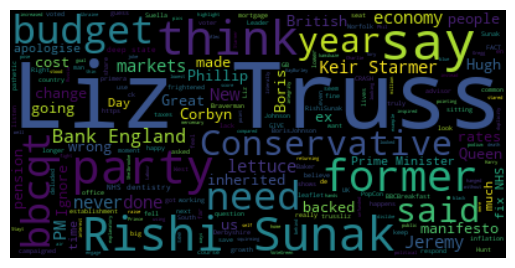

In [25]:
import matplotlib.pyplot as plt
consolidated = ' '.join(word for word in df['Cleaned_tweets'])

wordcloud = WordCloud(width=400, height=200, random_state=20,max_font_size=120).generate(consolidated)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
import seaborn as sns

<Axes: xlabel='tPolarity', ylabel='tSubjectivity'>

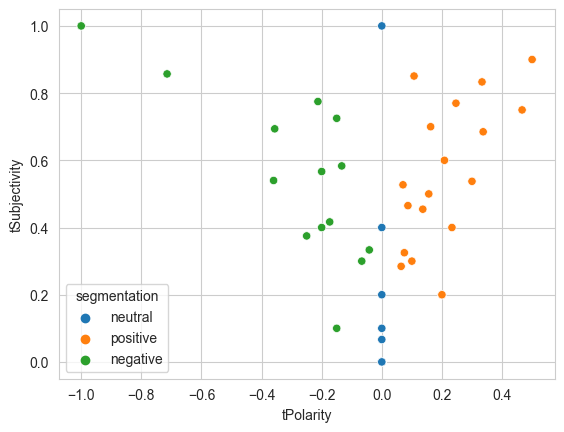

In [27]:
sns.set_style("whitegrid")
sns.scatterplot(data=df,x='tPolarity',y='tSubjectivity',hue='segmentation')


<Axes: xlabel='segmentation', ylabel='count'>

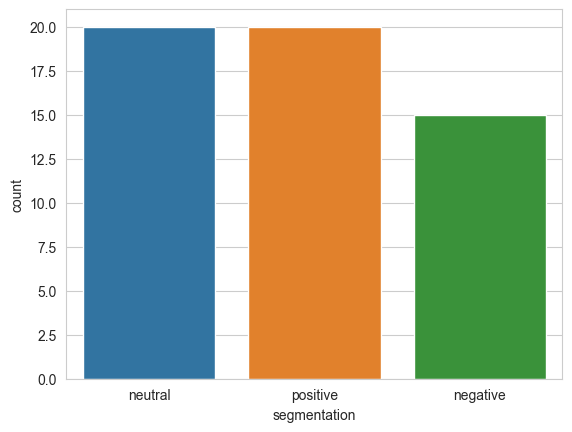

In [31]:
sns.countplot(data=df,x='segmentation')

In [32]:

positive = round(len(df[df.segmentation == 'positive'])/len(df)*100,1)
negative = round(len(df[df.segmentation == 'negative'])/len(df)*100,1)
neutral = round(len(df[df.segmentation == 'neutral'])/len(df)*100,1)

responses = [positive, negative, neutral]
responses

response = {'resp': ['mayWin', 'mayLoose', 'notSure'], 'pct':[positive, negative, neutral]}
pd.DataFrame(response)

,resp,pct
0,mayWin,36.4
1,mayLoose,27.3
2,notSure,36.4


In [33]:
responses = [positive, negative, neutral]
responses

response = {'resp': ['mayWin', 'mayLoose', 'notSure'], 'pct':[positive, negative, neutral]}
pd.DataFrame(response)

,resp,pct
0,mayWin,36.4
1,mayLoose,27.3
2,notSure,36.4
